In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
from main import Jugador, Juego


def plot(juego, axs, i, corr):
    ax = sns.violinplot(y=juego.perfect_sizes, x=[f'corr:{corr:.3f}'] * len(juego.perfect_sizes),
        palette="Set2", inner='point', ax=axs[0][i])
    ax.set_ylabel("Tam. cortes (perf))")
    ax.set_ylim(100, 180)
    ax = sns.violinplot(y=juego.cut_sizes, x=[f'corr:{corr:.3f}'] * len(juego.perfect_sizes),
        palette="Set2", inner='point', ax=axs[1][i])
    ax.set_ylabel("Tam. cortes (nos)")
    ax.set_ylim(110, 160)
    
    ax = sns.lineplot(y=np.cumsum(juego.score1) - np.cumsum(juego.score2), x=np.arange(juego.N), ax=axs[2][i], label="u(j1)-u(j2)")
    a = np.cumsum(juego.score1) - np.cumsum(juego.score2)
    print(np.min(a), np.max(a))
    ax.set(xlabel='Iter.', ylabel='Dif de u parciales')
    axs[2][i].axhline(y=1e-10, color='red', linestyle='--')  # Adjust the y-value as needed
    ax.set_ylim(-150, 1000)

Utilidad acumulada:
   Jugador 1: 8418.42857142858
   Jugador 2: 8583.071428571437
Perfectness 0.9907530388876743
DescribeResult(nobs=200, minmax=(111, 147), mean=127.845, variance=44.88540201005025, skewness=0.007558953369107236, kurtosis=0.2678614896710072)
-164.64285714285506 -1.642857142857153
[[ 1.         -0.01075198]
 [-0.01075198  1.        ]]
Utilidad acumulada:
   Jugador 1: 9019.137614678908
   Jugador 2: 8696.0
Perfectness 0.9391407852364316
DescribeResult(nobs=200, minmax=(117, 147), mean=129.83, variance=32.27246231155779, skewness=-0.05203493480340013, kurtosis=-0.402120564200914)
3.4357798165137865 327.84862385321867
[[1.         0.42554566]
 [0.42554566 1.        ]]
Utilidad acumulada:
   Jugador 1: 9823.828554301128
   Jugador 2: 9021.771060455887
Perfectness 0.8954514955948875
DescribeResult(nobs=200, minmax=(128, 167), mean=145.925, variance=53.16520100502513, skewness=0.1204108687792603, kurtosis=-0.2994391378103187)
10.28029926683439 805.9225632510697
[[1.        

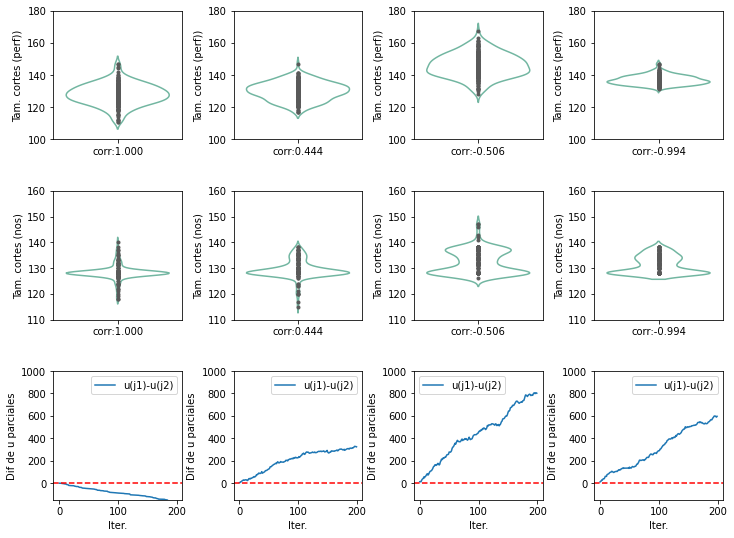

In [17]:
gustos = [
    ({'1': 10, '2': 3, '3': 1}, {'1': 10, '2': 3, '3': 1}),
    ({'1': 100, '2': 8, '3': 1}, {'1': 1, '2': 0, '3': 1}),
    ({'1': 10000, '2': 8, '3': 1}, {'1': 1, '2': 8, '3': 1000}),
    ({'1': 10, '2': 2, '3': 1}, {'1': 1, '2': 8, '3': 10}),
]


gs = GridSpec(3, 4, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1])
fig = plt.figure(figsize=(12, 9))

shared_axs_0 = fig.add_subplot(gs[0, 0])
shared_axs_1 = fig.add_subplot(gs[1, 0])
shared_axs_2 = fig.add_subplot(gs[2, 0])

axs = [
    [shared_axs_0] + [fig.add_subplot(gs[0, i]) for i in range(1, 4)],
    [shared_axs_1] + [fig.add_subplot(gs[1, i]) for i in range(1, 4)],
    [shared_axs_2] + [fig.add_subplot(gs[2, i]) for i in range(1, 4)]
]

fig.subplots_adjust(hspace=0.4, wspace=0.4)

i = 0
size = 256
for gustos_jugador1, gustos_jugador2 in gustos:
    jugador1 = Jugador(gustos_jugador1, T=size)
    jugador2 = Jugador(gustos_jugador2, T=size)
    juego = Juego(size, 200, jugador1, jugador2)
    juego.jugar()
    print(stats.describe(juego.perfect_sizes))
    corr = np.corrcoef(np.fromiter(gustos_jugador1.values(), dtype='float'),
                      np.fromiter(gustos_jugador2.values(), dtype='float'))[0, 1]
    plot(juego, axs, i, corr)
    print(np.corrcoef(juego.perfect_sizes,juego.cut_sizes))
    i += 1

for ax in axs[0]:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PolyCollection):
            collection.set_edgecolor(collection.get_facecolor())
            collection.set_facecolor('none')
            
for ax in axs[1]:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PolyCollection):
            collection.set_edgecolor(collection.get_facecolor())
            collection.set_facecolor('none')

plt.show()
